### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Datasets Information:`

*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating

*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)


*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use

**`Please provide your insights wherever necessary.`**

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### 1. Import the necessary packages - 2.5 marks

In [1]:
#your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
rating = pd.read_csv('Data.csv')
movie = pd.read_csv('item.csv')
user = pd.read_csv('user.csv')

### 3. Apply info, shape, describe, and find the number of missing values in the data. Present at least 3 observations from these operations - 2.5 marks
 - Note that you will need to do it for all the three datasets seperately

In [3]:
rating.describe(include='all').transpose()

,count,mean,std,min,25%,50%,75%,max
user id,100000.00,462.48,266.61,1.00,254.00,447.00,682.00,943.00
movie id,100000.00,425.53,330.80,1.00,175.00,322.00,631.00,1682.00
rating,100000.00,3.53,1.13,1.00,3.00,4.00,4.00,5.00
timestamp,100000.00,883528851.49,5343856.19,874724710.00,879448709.50,882826944.00,888259984.00,893286638.00


In [4]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [5]:
rating.shape

(100000, 4)

In [6]:
rating.isna().sum()

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [7]:
rating.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [8]:
user.shape

(943, 5)

In [9]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [10]:
user.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user id,943.0,NaN,NaN,NaN,472.0,272.36,1.0,236.5,472.0,707.5,943.0
age,943.0,NaN,NaN,NaN,34.05,12.19,7.0,25.0,31.0,43.0,73.0
gender,943,2,M,670,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,943,21,student,196,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zip code,943,795,55414,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
user.isna().sum()

user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64

In [12]:
user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [13]:
movie.shape

(1681, 22)

In [14]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  Romance       1681 non-null   int64 
 18  Sci-Fi        1681 non-null   int64 
 19  Thrill

In [15]:
movie.describe(include='all')

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.00,1681,1681,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,...,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00,1681.00
unique,NaN,1658,240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,That Darn Cat!,01-Jan-1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,3,215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,841.84,NaN,NaN,0.00,0.15,0.08,0.02,0.07,0.30,0.06,...,0.01,0.01,0.05,0.03,0.04,0.15,0.06,0.15,0.04,0.02
std,485.64,NaN,NaN,0.02,0.36,0.27,0.16,0.26,0.46,0.25,...,0.11,0.12,0.23,0.18,0.19,0.35,0.24,0.36,0.20,0.13
min,1.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,422.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,842.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,1262.00,NaN,NaN,0.00,0.00,0.00,0.00,0.00,1.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [16]:
movie.isna().sum()

movie id        0
movie title     0
release date    0
unknown         0
Action          0
Adventure       0
Animation       0
Childrens       0
Comedy          0
Crime           0
Documentary     0
Drama           0
Fantasy         0
Film-Noir       0
Horror          0
Musical         0
Mystery         0
Romance         0
Sci-Fi          0
Thriller        0
War             0
Western         0
dtype: int64

In [17]:
movie.head()

,movie id,movie title,release date,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [18]:
#len(movie)-movie.count()

In [19]:
# movie1 = pd.read_csv('item.csv')
# movie1 = movie1.melt(id_vars=['movie id','movie title','release date'],var_name="Genre",value_name='value')
# movie1.drop(movie1.index[movie1['value'] == 0], inplace = True)
# movie1[movie1['value']==1].sort_values('movie id',ascending=True)

**Observations:**
- No nulls/NAs in any of the 3 datasets
- Frequency of males is more than females in User Dataset
- 75% of Rating dataset has ratings between 1 to 4
- There are 1681 unique movies and 18 differenr genres (excluding unknown)

### 4. Find the number of movies per genre using the item data - 2.5 marks

In [20]:
genre = pd.DataFrame(movie.iloc[:,3:].sum(),columns=['count']).sort_values('count',ascending=False)
genre['percent'] = (genre['count']/genre['count'].sum())*100
genre

,count,percent
Drama,725,25.07
Comedy,505,17.46
Action,251,8.68
Thriller,251,8.68
Romance,247,8.54
Adventure,135,4.67
Childrens,122,4.22
Crime,109,3.77
Sci-Fi,101,3.49
Horror,92,3.18


**Insights:**
- 25% of movies are under Genre of "Drama"
- one movie with Genre "Unknown"
- count of movies of different genres are not equally distributed

### 5. Drop the movie where the genre is unknown - 2.5 marks

In [21]:
#your code here
movie.drop(movie.index[movie['unknown'] == 1], inplace = True)
movie.shape

(1680, 22)

In [22]:
#we can also delete the column as it is of no use
movie.drop('unknown',axis=1,inplace=True)
movie.shape

(1680, 21)

In [23]:
movie.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [24]:
movie['total genre']=movie.loc[:,'Action':'Western'].sum(axis=1)
movie[movie['total genre']>1].loc[:,['movie title','total genre']]

,movie title,total genre
0,Toy Story,3
1,GoldenEye,3
3,Get Shorty,3
4,Copycat,3
6,Twelve Monkeys,2
...,...,...
1667,MURDER and murder,3
1668,Tainted,2
1671,Mirage,2
1677,B. Monkey,2


In [25]:
print("Total number of movies with more than one genre are: " + str(movie[movie['total genre']>1]['movie id'].count()))

Total number of movies with more than one genre are: 849


In [26]:
movie['movie title'].value_counts()

That Darn Cat!              3
Designated Mourner, The     2
Ulee's Gold                 2
Body Snatchers              2
Sliding Doors               2
                           ..
Underground                 1
Two Deaths                  1
Beyond Rangoon              1
Time to Kill, A             1
Jefferson in Paris          1
Name: movie title, Length: 1657, dtype: int64

In [27]:
movie[movie['movie title'].str.contains("That Darn Cat!")]

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total genre
876,878,That Darn Cat!,14-Feb-1997,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,3
1001,1003,That Darn Cat!,14-Feb-1997,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,3
1442,1444,That Darn Cat!,01-Jan-1965,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,3


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age and countplot for release year, ratings, *

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

C:\Users\profe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='rating', ylabel='count'>

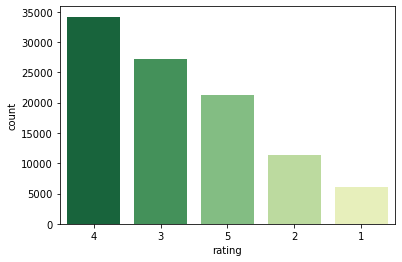

In [28]:
sns.countplot(rating['rating'],palette='YlGn_r',order=rating['rating'].value_counts().index)

C:\Users\profe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\profe\anaconda3\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

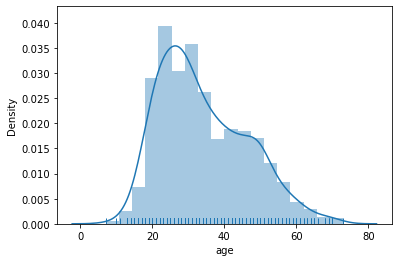

In [29]:
sns.distplot(user['age'],rug=True)

In [30]:
movie['release year'] = pd.DatetimeIndex(movie['release date']).year
movie.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total genre,release year
0,1,Toy Story,01-Jan-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,3,1995
1,2,GoldenEye,01-Jan-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,3,1995
2,3,Four Rooms,01-Jan-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1995
3,4,Get Shorty,01-Jan-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,3,1995
4,5,Copycat,01-Jan-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,3,1995


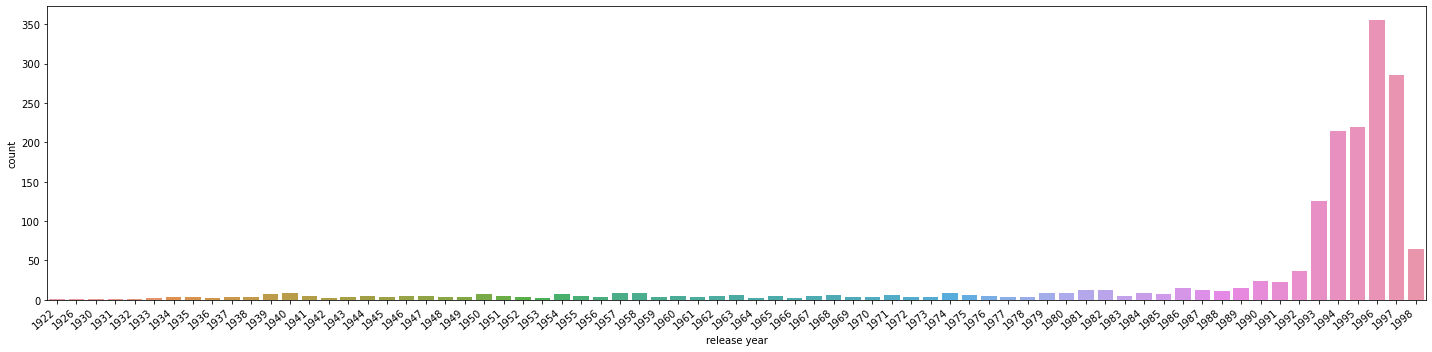

In [31]:
fig,ax = plt.subplots(figsize=(20,5))
ax=sns.countplot(x=movie['release year']);
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

In [32]:
#sns.distplot(movie['release year'],kde=False);

C:\Users\profe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


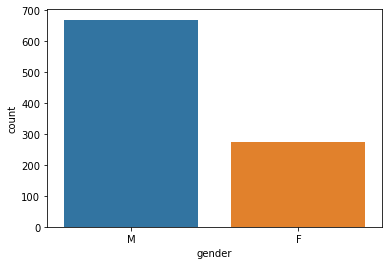

In [33]:
sns.countplot(user['gender']);

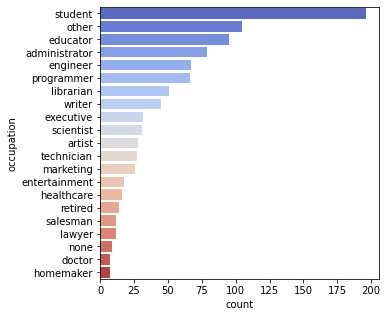

In [34]:
fig, ax = plt.subplots(figsize=(5,5))
sns.countplot(y='occupation',data=user,palette='coolwarm',order=user['occupation'].value_counts().index);

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use item dataset to get count of movies released in a particular year, store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.

In [35]:
movie.columns

Index(['movie id', 'movie title', 'release date', 'Action', 'Adventure',
       'Animation', 'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama',
       'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance',
       'Sci-Fi', 'Thriller', 'War', 'Western', 'total genre', 'release year'],
      dtype='object')

In [36]:
#groupby based on year
movieP = movie.loc[:,'Action':'release year']
movieP = movieP.groupby('release year').sum()
movieP.tail()

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total genre
release year,,,,,,,,,,,,,,,,,,,
1994,30,13,4,15,82,8,9,97,3,0,8,2,2,35,7,25,7,6,353
1995,40,22,6,21,63,11,5,89,3,1,14,3,5,37,15,39,5,2,381
1996,44,24,9,21,108,21,18,170,6,1,11,9,6,38,15,47,9,2,559
1997,46,20,3,22,87,30,6,113,4,2,8,5,18,51,13,54,14,0,496
1998,12,3,0,1,13,7,3,33,1,2,4,1,3,11,5,18,0,0,117


In [37]:
movieP.shape

(71, 19)

In [38]:
#I have aready created a column called "total genre" that contains the sum of movies for eah year
movieP.head()

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total genre
release year,,,,,,,,,,,,,,,,,,,
1922,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1926,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1930,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1931,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,3
1932,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,2


In [39]:
#% of number of releases in each year for each genre
moviePP = movieP.loc[:,'Action':'Western'].div(movieP['total genre'],axis=0)*100

In [40]:
moviePP.head()

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
release year,,,,,,,,,,,,,,,,,,
1922,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1926,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1930,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1931,0.00,0.00,0.00,0.00,0.00,33.33,0.00,0.00,0.00,33.33,0.00,0.00,0.00,0.00,0.00,33.33,0.00,0.00
1932,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00,0.00,0.00,50.00,0.00


C:\Users\profe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='release year', ylabel='Drama'>

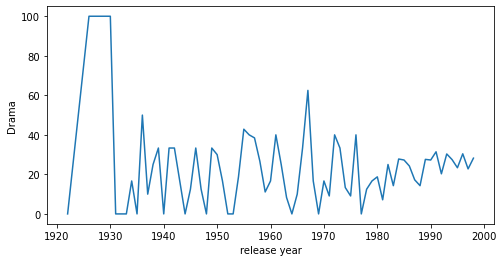

In [41]:
fig,ax = plt.subplots(figsize=(8,4))
sns.lineplot(moviePP.index,moviePP['Drama'])

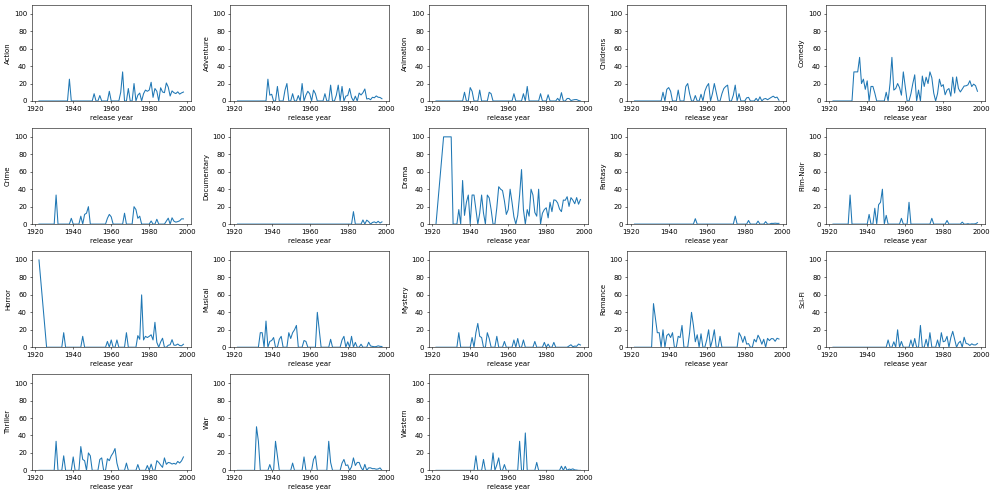

In [43]:
col = moviePP.columns.to_list()
fig,ax = plt.subplots(figsize=(20,10),dpi=50)
for i,j in enumerate(col):
    plt.subplot(4,5,i+1) 
    ax=sns.lineplot(x=moviePP.index,y=moviePP[j])
    #plt.ylabel(moviePP.columns[i])
    plt.tight_layout()
    ax.set(ylim=(0, 110))

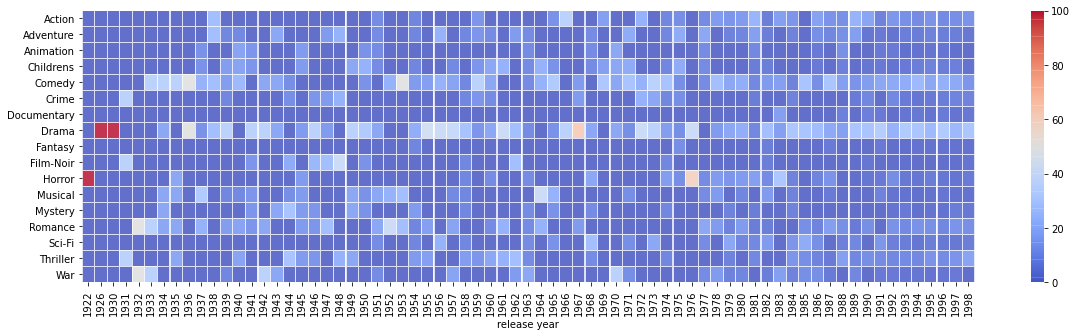

In [44]:
#popularity of genres has changed over the years
fig,ax = plt.subplots(figsize=(20,5))
sns.heatmap(moviePP.iloc[:,:-1].transpose(),cmap='coolwarm',linewidths=0.2,alpha=0.8);

### Trend of Number of movies released in each year

Text(-80, -20, '1996 Yr, 355 Movies')

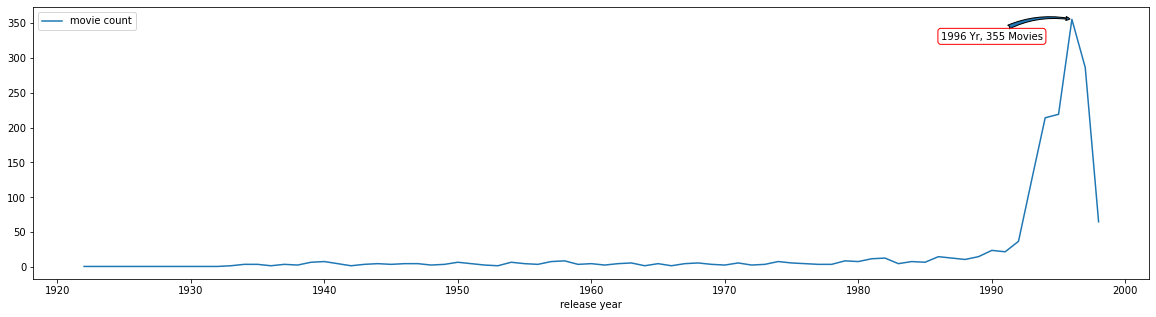

In [45]:
#Trend of Number of movies released in each year
mr = pd.DataFrame(movie.groupby('release year')['movie title'].count())
mr.columns = ['movie count']
fig,ax = plt.subplots(figsize=(20,5))
ax=sns.lineplot(data=mr)
#sns.lineplot(mr.index, mr['movie count'])
ax.annotate("1996 Yr, 355 Movies", xy=(1996, 355),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="red"),
            xytext=(-80, -20), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="fancy",
                            connectionstyle="arc3,rad=-0.2"))


In [46]:
mr.sort_values('movie count',ascending=False)[:10]

,movie count
release year,
1996,355
1997,286
1995,219
1994,214
1993,126
1998,65
1992,37
1990,24
1991,22


In [47]:
#Total number of different genres released in each year (based on Genres)
movieP.transpose().tail(1)

release year,1922,1926,1930,1931,1932,1933,1934,1935,1936,1937,...,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998
total genre,1,1,1,3,2,3,6,6,2,10,...,29,44,35,69,211,353,381,559,496,117


**Insights:**
- some genre become more popular over others in different years
- There is a sudden increase in number of movies released in year 1993 to 1994 and there is a fall in 1997 to 1998
- Though there is no much significance in increase or decrease of movies in different genres, Drama genre is popular and then comedy

### 9. Find the top 25 movies in terms of average ratings for movies that have been rated more than 100 times - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [48]:
movie_rating = rating.groupby('movie id').agg(rating_count=('rating','size'),avg_rating=('rating','mean')).reset_index()
top_25 = movie_rating[movie_rating['rating_count']>100].sort_values('avg_rating',ascending=False)[:25]
top_25 = pd.merge(top_25,movie,on='movie id').iloc[:,:4]
top_25 = top_25[['movie id','movie title','rating_count','avg_rating']]
top_25

,movie id,movie title,rating_count,avg_rating
0,408,"Close Shave, A",112,4.49
1,318,Schindler's List,298,4.47
2,169,"Wrong Trousers, The",118,4.47
3,483,Casablanca,243,4.46
4,64,"Shawshank Redemption, The",283,4.45
5,603,Rear Window,209,4.39
6,12,"Usual Suspects, The",267,4.39
7,50,Star Wars,583,4.36
8,178,12 Angry Men,125,4.34
9,134,Citizen Kane,198,4.29


In [48]:
# mean_rating = pd.DataFrame(rating.groupby(['movie id'],as_index=False)['rating'].mean()).sort_values('rating',ascending=False)
# count_rating = pd.DataFrame(rating.groupby(['movie id'],as_index=False)['rating'].count()).sort_values('rating',ascending=False)
# count_rating.columns = ['movie id','Rating Count']
# count_rating = count_rating[count_rating['Rating Count']>100]
# movie_rating = pd.merge(count_rating,mean_rating,on='movie id')
# movie_rating.columns = ['movie id','Rating Count','Avg Rating']
# movie_rating.sort_values('Avg Rating',ascending=False)[:25]

### 10. Check for the validity of the below statements with respect to the data provided - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

**Please pay attention to what should be the denominator while calculating percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [49]:
df=pd.merge(user,rating,on='user id')
df=pd.merge(df,movie,on='movie id')
df.shape

(99990, 30)

In [50]:
df.head()

,user id,age,gender,occupation,zip code,movie id,rating,timestamp,movie title,release date,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total genre,release year
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White,01-Jan-1994,...,0,0,0,0,0,0,0,0,1,1994
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White,01-Jan-1994,...,0,0,0,0,0,0,0,0,1,1994
2,18,35,F,other,37212,61,4,880130803,Three Colors: White,01-Jan-1994,...,0,0,0,0,0,0,0,0,1,1994
3,58,27,M,programmer,52246,61,5,884305271,Three Colors: White,01-Jan-1994,...,0,0,0,0,0,0,0,0,1,1994
4,59,49,M,educator,08403,61,4,888204597,Three Colors: White,01-Jan-1994,...,0,0,0,0,0,0,0,0,1,1994


In [51]:
Genre_by_gender = df.groupby('gender').sum().loc[:,'Action':'Western'] 
Genre_by_gender['total'] = df['gender'].value_counts()    #Row total of the dataframe
Genre_by_gender

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
gender,,,,,,,,,,,,,,,,,,,
F,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371,25738
M,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483,74252


In [52]:
Genre_by_gender = Genre_by_gender.div(Genre_by_gender.total, axis= 0) * 100 
#dividing each cell with row total and multiplying by 100

Genre_by_gender

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,total
gender,,,,,,,,,,,,,,,,,,,
F,21.14,12.20,3.87,8.67,31.35,6.97,0.73,42.77,1.41,1.50,4.65,5.60,5.11,22.76,10.21,19.76,8.50,1.44,100.00
M,27.13,14.29,3.52,6.67,29.31,8.43,0.77,38.90,1.33,1.82,5.55,4.73,5.29,18.32,13.60,22.61,9.71,2.00,100.00


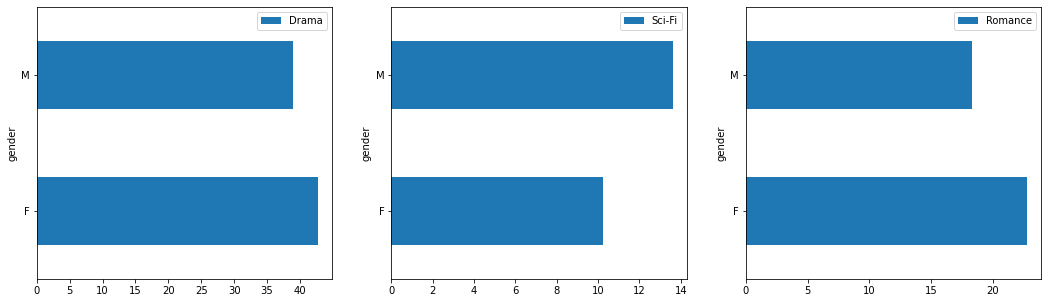

In [67]:
# Additional

# Plotting results for Drama, Sci-Fi and Romance

fig, ax = plt.subplots(ncols = 3, figsize = (18, 5))             
# Using subplots with 3 columns so that all figure are plotting in one row 

Genre_by_gender['Drama'].plot(kind='barh',label='Drama',ax=ax[0])
ax[0].legend()
# legend is used to get the labels, ax is to detemine the position of the plot
# 'barh' is for thr horizontal bar plot

Genre_by_gender['Sci-Fi'].plot(kind='barh',label='Sci-Fi',ax=ax[1])
ax[1].legend()

Genre_by_gender['Romance'].plot(kind='barh',label='Romance',ax=ax[2])
ax[2].legend()

plt.show()

**Conclusion:**
- #Men watch more drama than women ---- NO
- #Women watch more Sci-Fi than men ---- NO
- #Men watch more Romance than women ---- NO

##### ` Answer: All the statements were false.`

### Trend of movie viewers and their rating habits

In [55]:
#trend of movie viewers and their rating habits
yr = pd.DataFrame(df.groupby('release year')['rating'].mean())
yr.head()

,rating
release year,
1922,3.56
1926,3.00
1930,3.78
1931,4.00
1932,3.83


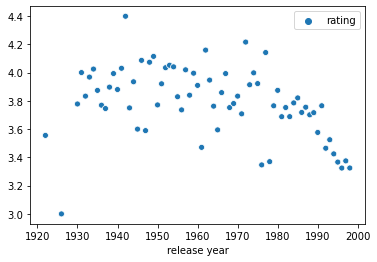

In [56]:
sns.scatterplot(data=yr)
#decrease in avg rating in recent years

In [65]:
# import pandas_profiling 
# pandas_profiling.ProfileReport(movie)